In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
happines_data_2015 = pd.read_csv('2015.csv', parse_dates=True, encoding = "cp1252")
happines_data_2016 = pd.read_csv('2016.csv', parse_dates=True, encoding = "cp1252")
happines_data_2017 = pd.read_csv('2017.csv', parse_dates=True, encoding = "cp1252")
happines_data_2018 = pd.read_csv('2018.csv', parse_dates=True, encoding = "cp1252")
happines_data_2019 = pd.read_csv('2019.csv', parse_dates=True, encoding = "cp1252")

In [3]:
happines_data_2015.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis=1, inplace=True)
happines_data_2015.rename({'Happiness Rank':'Overall rank', 
                           'Country':'Country or region', 
                           'Happiness Score': 'Score', 
                           'Economy (GDP per Capita)': 'GDP per capita', 
                           'Family':'Social support', 
                           'Health (Life Expectancy)':'Healthy life expectancy', 
                           'Freedom':'Freedom to make life choices', 
                           'Trust (Government Corruption)':'Perceptions of corruption'}, axis=1, inplace=True)
happines_data_2015.head()

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [4]:
happines_data_2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1, inplace=True)
happines_data_2016.rename({'Happiness Rank':'Overall rank', 
                           'Country':'Country or region', 
                           'Happiness Score': 'Score', 
                           'Economy (GDP per Capita)': 'GDP per capita', 
                           'Family':'Social support', 
                           'Health (Life Expectancy)':'Healthy life expectancy', 
                           'Freedom':'Freedom to make life choices', 
                           'Trust (Government Corruption)':'Perceptions of corruption'}, axis=1, inplace=True)
happines_data_2016.head()

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [5]:
happines_data_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)
happines_data_2017.rename({'Happiness.Rank':'Overall rank', 
                           'Country':'Country or region', 
                           'Happiness.Score': 'Score', 
                           'Economy..GDP.per.Capita.': 'GDP per capita', 
                           'Family':'Social support', 
                           'Health..Life.Expectancy.':'Healthy life expectancy', 
                           'Freedom':'Freedom to make life choices', 
                           'Trust..Government.Corruption.':'Perceptions of corruption'}, axis=1, inplace=True)
happines_data_2017.head()

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [6]:
happines_data = pd.concat([happines_data_2019, happines_data_2018, happines_data_2017, happines_data_2016, happines_data_2015])
happines_data.drop(['Overall rank', 'Country or region'], axis=1, inplace=True)
happines_data.head(800)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300
1,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000
2,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100
3,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800
4,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [7]:
happines_data.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910


In [8]:
happines_data['Perceptions of corruption'].isnull().values.any()

True

In [9]:
happines_data['Perceptions of corruption'].isnull().sum()

1

In [10]:
happines_data['Perceptions of corruption'] = happines_data['Perceptions of corruption'].fillna(0)

In [11]:
X = happines_data[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = happines_data['Score']


<AxesSubplot:>

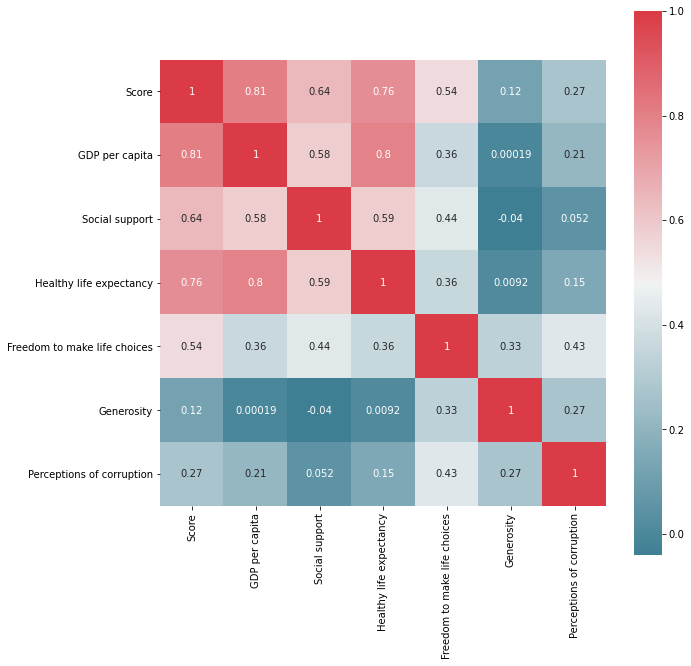

In [12]:
# corr = happines_data.corr(method = "pearson")
corr = happines_data.corr(method = "spearman")
# corr = happines_data.corr(method = "kendall")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True,)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=12, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=120, activation='exponential'),
  tf.keras.layers.Dense(units=34, activation='relu'),
  tf.keras.layers.Dense(units=14, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 52)                676       
_________________________________________________________________
dropout (Dropout)            (None, 52)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               6360      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                4114      
_________________________________________________________________
dense_4 (Dense)              (None, 14)                490       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

reg = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, callbacks=[callback])

Epoch 1/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3035 - mae: 0.4335 - mse: 0.3035 - val_loss: 0.2979 - val_mae: 0.4373 - val_mse: 0.2979
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2889 - mae: 0.4260 - mse: 0.2889 - val_loss: 0.2964 - val_mae: 0.4318 - val_mse: 0.2964
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2928 - mae: 0.4311 - mse: 0.2928 - val_loss: 0.2940 - val_mae: 0.4335 - val_mse: 0.2940
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2850 - mae: 0.4222 - mse: 0.2850 - val_loss: 0.2924 - val_mae: 0.4282 - val_mse: 0.2924
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2875 - mae: 0.4253 - mse: 0.2875 - val_loss: 0.2883 - val_mae: 0.4297 - val_mse: 0.2883
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2856 - mae: 0.4306 - mse: 0.2856 - val_loss: 0.2941 - val_mae: 0.4312 - val_mse: 0.2941
Epoch 7/200
20/20 [===

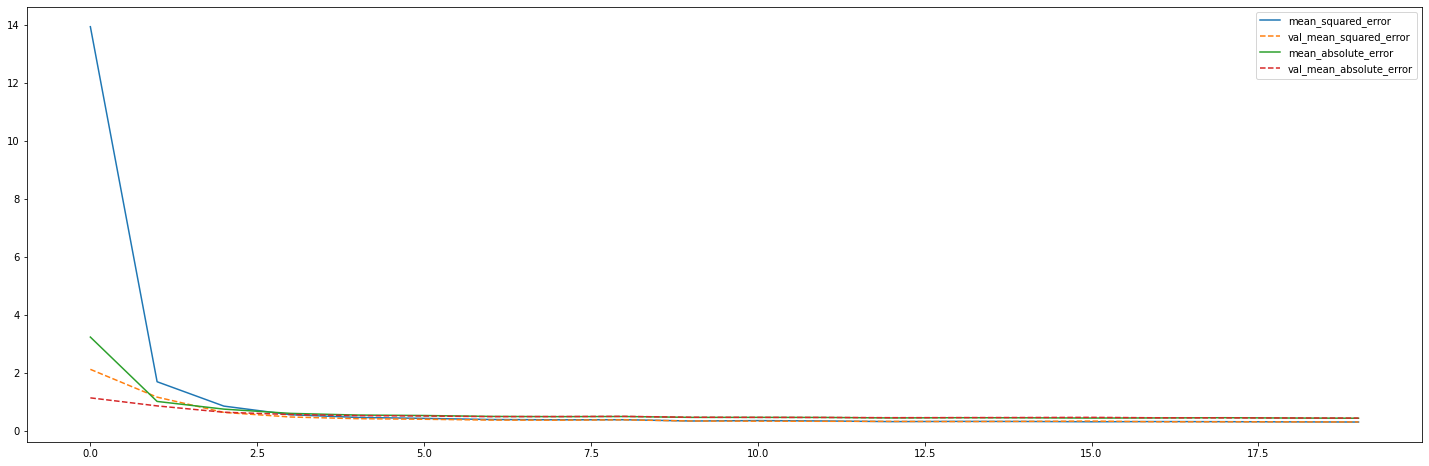

In [17]:
fig, ax = plt.subplots(figsize=(25,8)) 

plt.plot(reg.history['mse'], label='mean_squared_error')
plt.plot(reg.history['val_mse'], label='val_mean_squared_error', linestyle='--')
plt.plot(reg.history['mae'], label='mean_absolute_error')
plt.plot(reg.history['val_mae'], label='val_mean_absolute_error', linestyle='--')
plt.legend()

In [18]:
correct=[]
X_list=X_test
y_list=list(y_test)
for i in range(len(X_list)):
    a=y_list[i]
    b=model.predict([[X_list[i][0],X_list[i][1],X_list[i][2],X_list[i][3],X_list[i][4],X_list[i][5]]])[0][0]

    correct.append((abs(a-b)/a))


print(1-sum(correct) / len(correct))

0.9150378102866363
